# Roller Coaster

In [1]:
# 1 
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# load rankings data
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
wood.head()
# load rankings data
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
steel.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


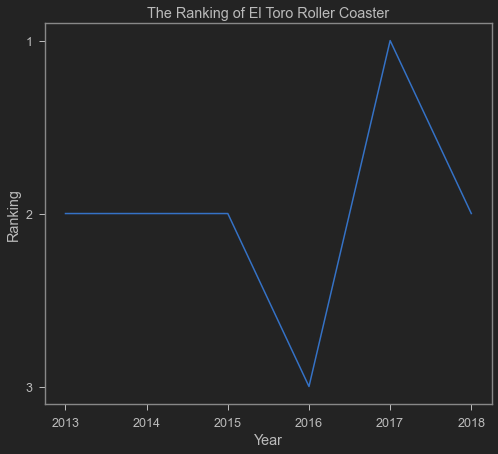

In [2]:
# Create a function to plot rankings over time for 1 roller coaster
def rank(name,park_name,rank_df):
    coaster_rank = rank_df[(rank_df.Name == name) & (rank_df.Park == park_name)]
    plt.title('The Ranking of {} Roller Coaster'.format(name))
    ax = plt.subplot()
    ax.invert_yaxis()
    ax.set_yticks(range(max(coaster_rank.Rank)+1))
    ax.plot(coaster_rank['Year of Rank'], coaster_rank.Rank)
    plt.ylabel('Ranking')
    plt.xlabel('Year')
    plt.show()
    
# Create a plot of El Toro ranking over time
rank('El Toro','Six Flags Great Adventure',wood)

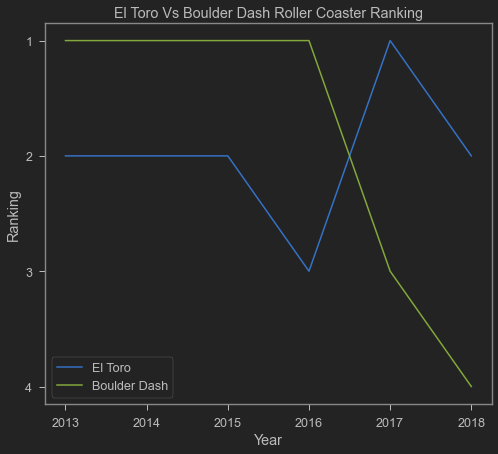

<Figure size 576x504 with 0 Axes>

In [3]:
# Create a function to plot rankings over time for 2 roller coasters
def compare_2_coaster(name1,park_name1,name2,park_name2,rank_df):
    coaster_rank1 = rank_df[(rank_df.Name == name1) & (rank_df.Park == park_name1)]
    coaster_rank2 = rank_df[(rank_df.Name == name2) & (rank_df.Park == park_name2)]
    
    plt.title('{} Vs {} Roller Coaster Ranking'.format(name1,name2))
    
    ax = plt.subplot()
    ax.set_yticks(range(max(coaster_rank1.Rank)))
    ax.plot(coaster_rank1['Year of Rank'], coaster_rank1.Rank)
    
    ax.set_yticks(range(max(coaster_rank2.Rank)+1))
    ax.plot(coaster_rank2['Year of Rank'], coaster_rank2.Rank)
    plt.ylabel('Ranking')
    plt.xlabel('Year')
    plt.legend([name1,name2])
    ax.invert_yaxis()
    plt.show()
    
# Create a plot of El Toro and Boulder Dash roller coasters
compare_2_coaster('El Toro','Six Flags Great Adventure','Boulder Dash', 'Lake Compounce', wood)
plt.clf()

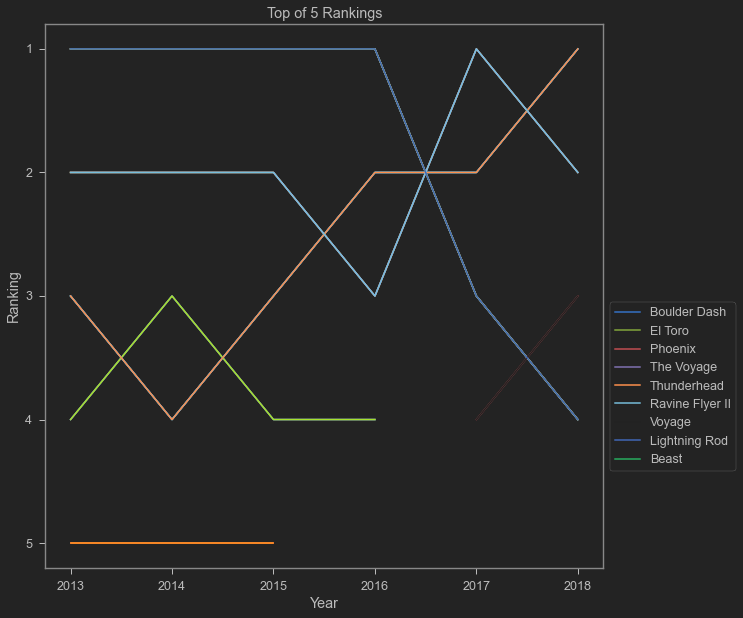

<Figure size 576x504 with 0 Axes>

In [4]:
# Create a function to plot top n rankings over time
def top_n(n,df):
    top_n = df[df.Rank <=n]
    label = top_n.Name.unique()
    fig, ax = plt.subplots(figsize=(10,10))
    for x in top_n.Name:
        coaster_rank = top_n[top_n.Name == x]
        ax.plot(coaster_rank['Year of Rank'], coaster_rank.Rank)
    
    ax.set_yticks([i for i in range(1,n+1)])
    plt.title('Top of {} Rankings'.format(n))
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend(label,  bbox_to_anchor=(1, 0.5))
    ax.invert_yaxis()
    plt.show()
    plt.close()

# Create a plot of top n rankings over time
top_n(5,wood)
plt.clf()

In [5]:
# load roller coaster data
coaster = pd.read_csv('roller_coasters.csv')
coaster.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


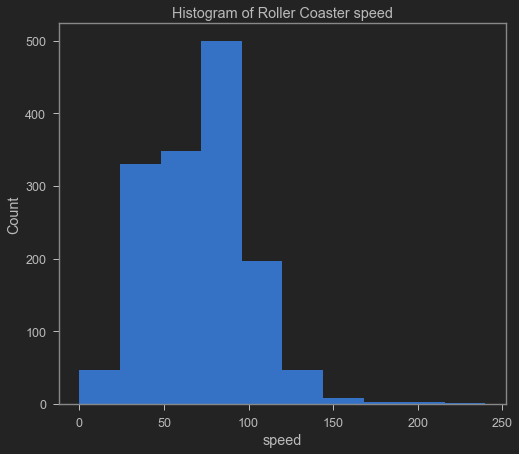

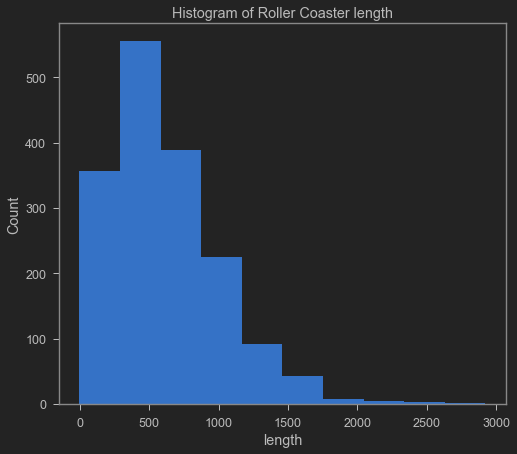

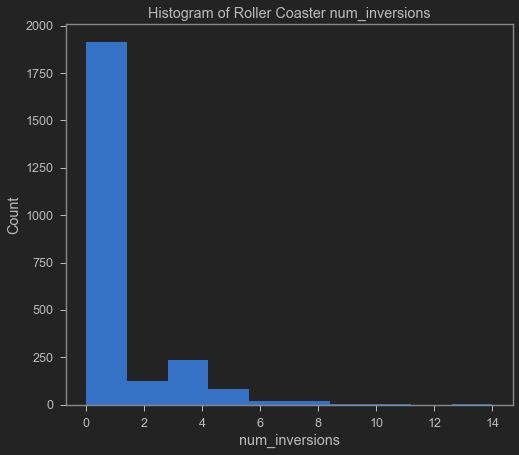

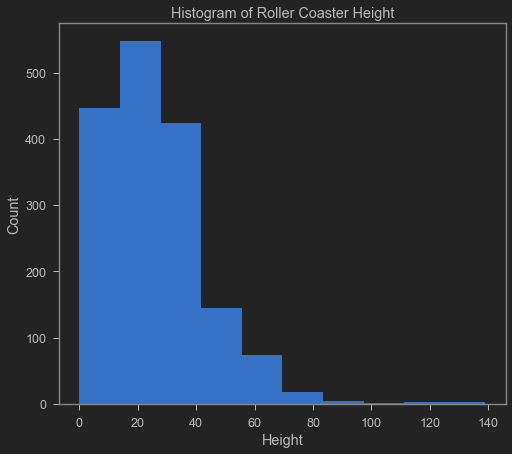

<Figure size 576x504 with 0 Axes>

In [6]:
ax = plt.subplot()
# Create a function to plot histogram of column values
def plot_hist(df,column):
    plt.hist(coaster[column].dropna())
    plt.title('Histogram of Roller Coaster {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    plt.close()
    plt.clf()
# Create histogram of roller coaster speed
plot_hist(coaster,'speed')
# Create histogram of roller coaster length
plot_hist(coaster,'length')
# Create histogram of roller coaster number of inversions
plot_hist(coaster,'num_inversions')
# Create a function to plot histogram of height values
def plot_height_histogram(coaster_df):
    heights = coaster_df[coaster_df['height'] <= 140]['height'].dropna()
    plt.hist(heights)
    plt.title('Histogram of Roller Coaster Height')
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.show()
    plt.close()
    plt.clf()
# Create a histogram of roller coaster height
plot_height_histogram(coaster)

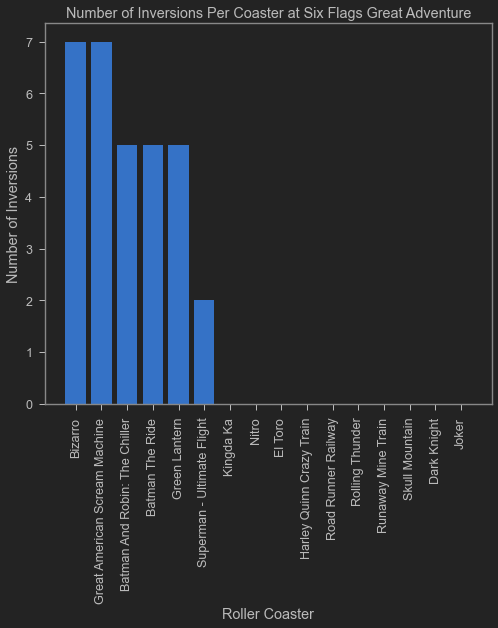

In [7]:
# Create a function to plot inversions by coaster at park
def inv_bar(df,park_name):
    coasters = df[df.park == park_name]
    coasters = coasters.sort_values('num_inversions', ascending=False)
    
    plt.bar(range(len(coasters.num_inversions)),coasters.num_inversions)
    ax = plt.subplot()
    ax.set_xticks(range(len(coasters.name)))
    ax.set_xticklabels(coasters.name,rotation=90)
    plt.title('Number of Inversions Per Coaster at {}'.format(park_name))
    plt.xlabel('Roller Coaster')
    plt.ylabel('Number of Inversions')
    plt.show()
    plt.close()
# Create barplot of inversions by roller coasters
inv_bar(coaster,'Six Flags Great Adventure')

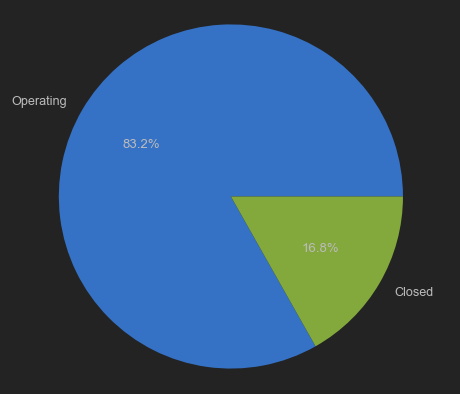

<Figure size 576x504 with 0 Axes>

In [8]:
# Create a function to plot a pie chart of status.operating
def pie_chart_status(coaster_df):
    operating_coasters = coaster_df[coaster_df['status'] == 'status.operating']
    closed_coasters = coaster_df[coaster_df['status'] == 'status.closed.definitely']
    num_operating_coasters = len(operating_coasters)
    num_closed_coasters = len(closed_coasters)
    status_counts = [num_operating_coasters,num_closed_coasters]
    plt.pie(status_counts,autopct='%0.1f%%',labels=['Operating','Closed'])
    plt.axis('equal')
    plt.show()
    plt.close()
    plt.clf()

# Create pie chart of roller coasters
pie_chart_status(coaster)



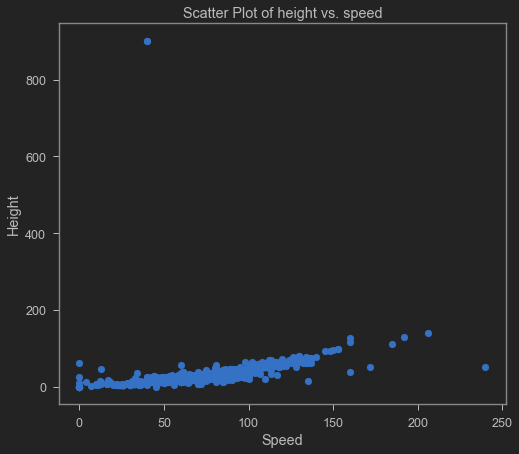

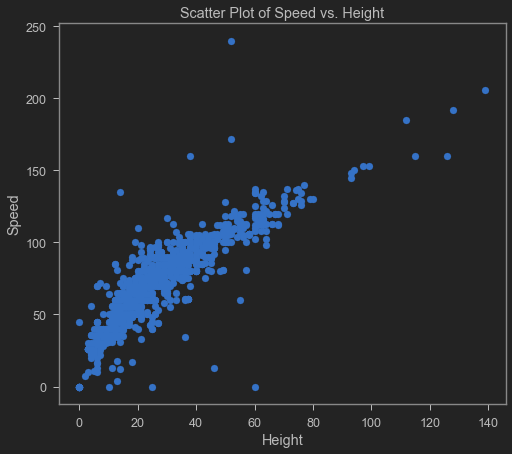

<function matplotlib.pyplot.clf()>

In [9]:
def plot_scatter(coaster_df, column_x, column_y):
    plt.scatter(coaster_df[column_x],coaster_df[column_y])
    plt.title('Scatter Plot of {} vs. {}'.format(column_y,column_x))
    plt.xlabel(str.title(column_x))
    plt.ylabel(str.title(column_y))
    plt.show()
    plt.close()

# Create a function to plot scatter of speed vs height
def plot_scatter_height_speed(coaster_df):
    coaster_df = coaster_df[coaster_df['height'] < 140]
    plt.scatter(coaster_df['height'],coaster_df['speed'])
    plt.title('Scatter Plot of Speed vs. Height')
    plt.xlabel('Height')
    plt.ylabel('Speed')
    plt.show()
    plt.close()

# Create a scatter plot of roller coaster height by speed
plot_scatter(coaster,'speed','height')
plot_scatter_height_speed(coaster)
plt.clf
